In [1]:
import cartopy.crs as crs 
import matplotlib.pyplot as plt 
import cartopy.io.img_tiles as cimgt
import xarray as xr 

In [2]:
!pwd

/home/jovyan


In [3]:
path = '/home/jovyan/'
file = 'HurricaneIAN.nc'

test_data = xr.open_dataset(path+file).isel(time=0,level=-1)

test_data


<xarray.Dataset> Size: 477kB
Dimensions:    (longitude: 61, latitude: 61)
Coordinates:
  * longitude  (longitude) float32 244B -90.0 -89.75 -89.5 ... -75.25 -75.0
  * latitude   (latitude) float32 244B 35.0 34.75 34.5 34.25 ... 20.5 20.25 20.0
    level      int32 4B 1000
    time       datetime64[ns] 8B 2022-09-19
Data variables: (12/16)
    d          (latitude, longitude) float64 30kB ...
    cc         (latitude, longitude) float64 30kB ...
    z          (latitude, longitude) float64 30kB ...
    o3         (latitude, longitude) float64 30kB ...
    pv         (latitude, longitude) float64 30kB ...
    r          (latitude, longitude) float64 30kB ...
    ...         ...
    cswc       (latitude, longitude) float64 30kB ...
    t          (latitude, longitude) float64 30kB ...
    u          (latitude, longitude) float64 30kB ...
    v          (latitude, longitude) float64 30kB ...
    w          (latitude, longitude) float64 30kB ...
    vo         (latitude, longitude) float64 30kB ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-11-04 17:08:54 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

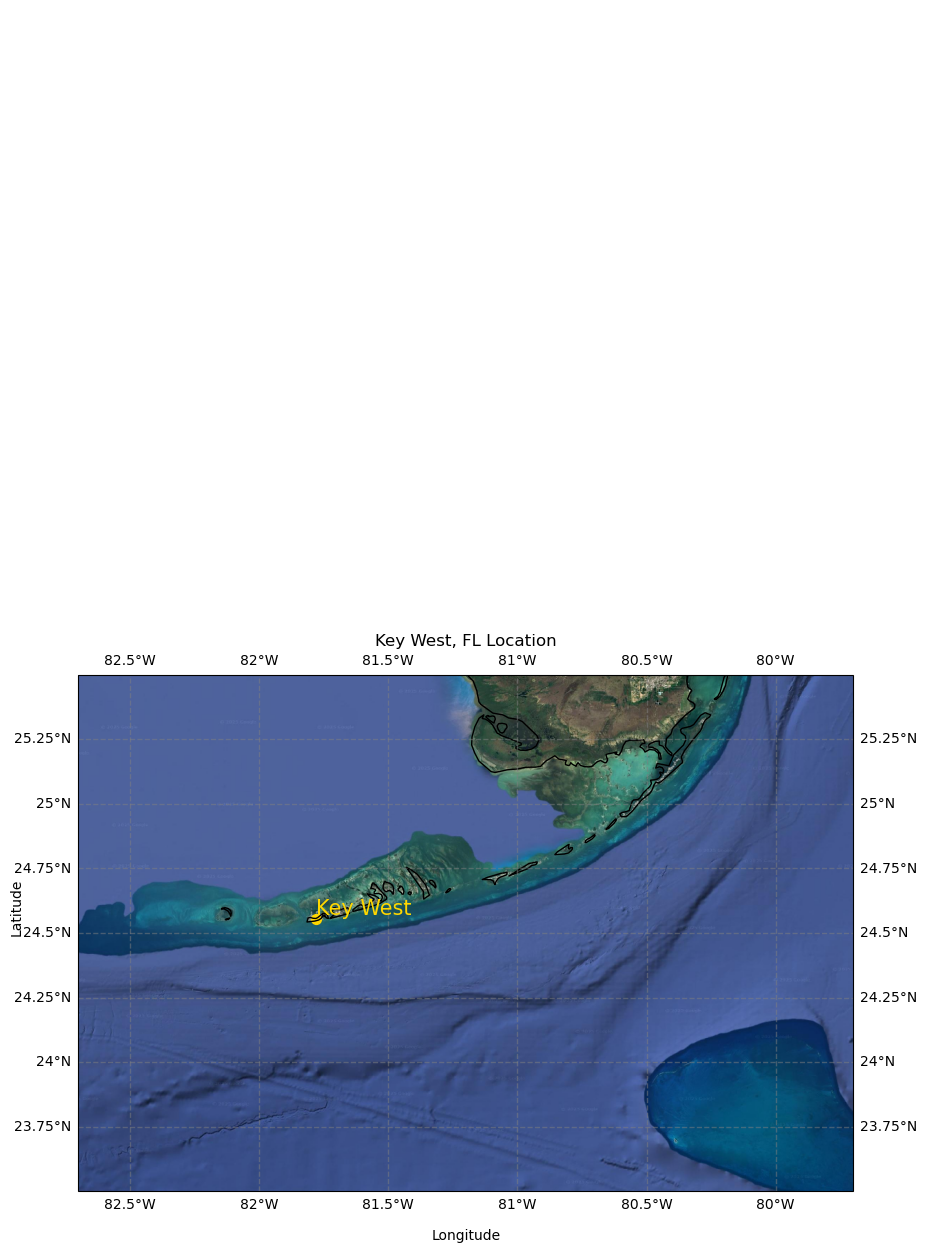

In [7]:
# Define city coordinates (longitude, latitude) 
cities = {
    "Key West": (-81.7799, 24.5551),
}

tile_source = cimgt.GoogleTiles(style='Satellite')

#tile_source = cimgt.GoogleTiles()
fig,ax = plt.subplots(figsize=(10,12),subplot_kw={'projection':crs.PlateCarree()})

#fig,ax = plt.subplots(figsize=(12,12),subplot_kw={'projection':tile_source.crs})

grid = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

# Add city labels
for city, (lon, lat) in cities.items():
    plt.scatter(lon, lat, color='gold', s=50, marker="o", edgecolor="gold")  # City marker
    plt.text(lon, lat, city, fontsize=15, ha="left", va="bottom", color="gold")  # City name

# Labels12
ax.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)

ax.coastlines()

ax.set_title('Key West, FL Location', fontsize = 12)

ax.set_extent([-82.7,-79.7,25.5,23.5])

ax.add_image(tile_source,10)

ax.scatter(-80.6,28,transform=crs.PlateCarree(),color='red')

ax.text(s='MLB',x=-80.5,y=28,transform=crs.PlateCarree(),size=18,color='white')

fig.savefig('Key_West_location.png',dpi=150, bbox_inches = 'tight')